In [1]:
#!pip install scikit-learn   ---- dodano do requirements


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [49]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import root_mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy import stats

In [9]:
player_id = 355 
url_player = f'https://fantasy.premierleague.com/api/element-summary/{player_id}/'
api_result_player = requests.get(url_player).json()
stats = api_result_player['history']
df_stats = pd.json_normalize(stats)
df_stats.index = np.arange(1, len(df_stats) + 1)
features = ['opponent_team', 'was_home', 'minutes', 'total_points', 'goals_scored', 'assists', 'expected_goals', 'expected_assists', 'clean_sheets']
df_stats.columns.values

# features = ['element', 'opponent_team', 'was_home', 'total_points']

array(['element', 'fixture', 'opponent_team', 'total_points', 'was_home',
       'kickoff_time', 'team_h_score', 'team_a_score', 'round', 'minutes',
       'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'starts', 'expected_goals',
       'expected_assists', 'expected_goal_involvements',
       'expected_goals_conceded', 'value', 'transfers_balance',
       'selected', 'transfers_in', 'transfers_out'], dtype=object)

In [10]:
df_stats = df_stats[features]
#df_stats['avg_points'] = df_stats.total_points.rolling(window=3, closed = 'left', min_periods = 1).mean()

In [11]:
df_stats

,opponent_team,was_home,minutes,total_points,goals_scored,assists,expected_goals,expected_assists,clean_sheets
1,6,False,79,13,2,0,0.60,0.05,1
2,15,True,90,2,0,0,0.43,0.02,1
3,17,False,90,4,1,0,1.93,0.01,0
4,10,True,90,20,3,1,1.58,0.10,0
5,19,False,90,6,1,0,2.56,0.03,0
6,16,True,90,6,1,0,0.69,0.01,1
7,20,False,90,2,0,0,0.06,0.03,0
8,1,False,90,2,0,0,0.00,0.17,0
9,5,True,90,8,1,0,0.26,0.00,0
10,14,False,90,16,2,1,2.04,0.47,1


In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_stats[['avg_points']], df_stats['total_points'], test_size=0.3, random_state=0)

In [26]:
class MyBaselineEstimator(BaseEstimator, TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.column_name]

    def predict(self, X):
        return self.transform(X)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipeline_champion = Pipeline([
    ('classifier', MyBaselineEstimator('avg_points')),
])
pipeline_challenger = Pipeline([
    ('LinearRegression', LinearRegression())
     ])

In [30]:
def compare_two_pipelines_performance(pipeline_champion, pipeline_challenger,
                                      X_train, X_test, y_train, y_test):
    # Train pipeline1
    pipeline_champion.fit(X_train, y_train)
    y_pred_champion = pipeline_champion.predict(X_test)
    # Train pipeline2
    pipeline_challenger.fit(X_train, y_train)
    y_pred_challenger = pipeline_challenger.predict(X_test)
    # Compute the accuracy of pipeline1
    champion_accuracy = root_mean_squared_error(y_test, y_pred_champion)
    # Compute the accuracy of pipeline2
    challenger_accuracy = root_mean_squared_error(y_test, y_pred_challenger)
    print(f"pipeline_champion accuracy: {champion_accuracy}")
    print(f"pipeline_challenger accuracy: {challenger_accuracy}")
    return champion_accuracy, challenger_accuracy

In [31]:
compare_two_pipelines_performance(pipeline_champion, pipeline_challenger, X_train, X_test, y_train, y_test)

pipeline_champion accuracy: 5.964144951290168
pipeline_challenger accuracy: 5.414548839703626


(5.964144951290168, 5.414548839703626)

In [98]:
###  TO DO: DODAĆ DO df_players_stats KOLUMNĘ avg_points A NASTĘPNIE WYKONAĆ PORÓWNANIE PIPELINE

In [12]:
# Let's create dataframe df_players_stats including all the data on players performance in each game
d = {'element': [], 'opponent_team': [], 'was_home': [], 'minutes': [],'total_points': [], 'goals_scored': [], 'assists': [], 'expected_goals': [], 'expected_assists': [], 'clean_sheets': []}
df_players_stats = pd.DataFrame(d)
columns = ['element', 'opponent_team', 'was_home', 'minutes', 'total_points', 'goals_scored', 'assists', 'expected_goals', 'expected_assists', 'clean_sheets']

for i in range(1, 839):
    url = f'https://fantasy.premierleague.com/api/element-summary/{i}/'
    try:
        api_result = requests.get(url).json()
        stats = api_result['history']
        df_stats = pd.json_normalize(stats)
        df_stats.index = np.arange(1, len(df_stats) + 1)
        df_stats = df_stats.reindex(columns=columns)
        df_stats['avg_minutes'] = df_stats.minutes.rolling(window=3, closed = 'left', min_periods = 1).mean()
        df_stats['avg_points'] = df_stats.total_points.rolling(window=3, closed = 'left', min_periods = 1).mean()
        df_stats['avg_goals'] = df_stats.goals_scored.rolling(window=3, closed = 'left', min_periods = 1).mean()
        df_stats['avg_xG'] = df_stats.expected_goals.rolling(window=3, closed = 'left', min_periods = 1).mean()
        df_stats['avg_assists'] = df_stats.assists.rolling(window=3, closed = 'left', min_periods = 1).mean()
        df_stats['avg_xA'] = df_stats.expected_assists.rolling(window=3, closed = 'left', min_periods = 1).mean()
        df_stats['clean_sheets_last3'] = df_stats.clean_sheets.rolling(window=3, closed = 'left', min_periods = 1).sum()
        df_players_stats = pd.concat([df_players_stats, df_stats])
    except Exception as e:
        print(f'Error fetching data for player {i}: {e}')
        continue

df_players_stats.index = np.arange(1, len(df_players_stats) + 1)

Error fetching data for player 612: 'history'


In [14]:
df_players_stats

,element,opponent_team,was_home,minutes,total_points,goals_scored,assists,expected_goals,expected_assists,clean_sheets,avg_minutes,avg_points,avg_goals,avg_xG,avg_assists,avg_xA,clean_sheets_last3
1,1.0,16.0,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,1.0,10.0,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29542,838.0,18.0,True,5.0,1.0,0.0,0.0,0.00,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
29543,838.0,19.0,True,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.666667,0.333333,0.0,0.0,0.0,0.0,0.0
29544,838.0,16.0,False,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.666667,0.333333,0.0,0.0,0.0,0.0,0.0
29545,838.0,5.0,False,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.666667,0.333333,0.0,0.0,0.0,0.0,0.0


In [15]:
# After creation of df_players_stats dataframe let's clean the data and prepare it for further predictions
df_players_stats.avg_points = df_players_stats.avg_points.fillna(1)
df_players_stats.avg_minutes = df_players_stats.avg_minutes.fillna(0)
df_players_stats.avg_goals = df_players_stats.avg_goals.fillna(0)
df_players_stats.avg_xG = df_players_stats.avg_xG.fillna(0)
df_players_stats.avg_assists = df_players_stats.avg_assists.fillna(0)
df_players_stats.avg_xA = df_players_stats.avg_xA.fillna(0)
df_players_stats.clean_sheets_last3 = df_players_stats.clean_sheets_last3.fillna(0)
df_players_stats['avg_points'] = round(df_players_stats['avg_points'], 2)
df_players_stats['avg_minutes'] = round(df_players_stats['avg_minutes'], 2)
df_players_stats['avg_goals'] = round(df_players_stats['avg_goals'], 2)
df_players_stats['avg_xG'] = round(df_players_stats['avg_xG'], 2)
df_players_stats['avg_assists'] = round(df_players_stats['avg_assists'], 2)
df_players_stats['avg_xA'] = round(df_players_stats['avg_xA'], 2)
df_players_stats['was_home'] = df_players_stats['was_home'].astype('bool')
df_players_stats['opponent_team'] = df_players_stats['opponent_team'].astype('int')
df_players_stats['element'] = df_players_stats['element'].astype('int64')

df_players_stats.describe()

,element,opponent_team,minutes,total_points,goals_scored,assists,clean_sheets,avg_minutes,avg_points,avg_goals,avg_xG,avg_assists,avg_xA,clean_sheets_last3
count,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000,29546.000000
mean,391.344818,10.494212,25.332837,1.058011,0.040479,0.036249,0.064408,24.711461,1.059260,0.039059,0.039493,0.034978,0.024831,0.183984
std,227.942537,5.767908,37.541406,2.298951,0.221197,0.205540,0.245483,34.391935,1.743668,0.145623,0.111829,0.130315,0.062677,0.478612
min,1.000000,1.000000,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,195.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,389.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,584.000000,15.000000,67.000000,1.000000,0.000000,0.000000,0.000000,54.330000,1.330000,0.000000,0.020000,0.000000,0.010000,0.000000
max,838.000000,20.000000,90.000000,26.000000,4.000000,4.000000,1.000000,90.000000,17.000000,2.330000,2.020000,2.000000,0.940000,3.000000


In [16]:
df_players_stats

,element,opponent_team,was_home,minutes,total_points,goals_scored,assists,expected_goals,expected_assists,clean_sheets,avg_minutes,avg_points,avg_goals,avg_xG,avg_assists,avg_xA,clean_sheets_last3
1,1,16,True,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0
2,1,8,False,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
3,1,10,True,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
4,1,14,True,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
5,1,9,False,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29542,838,18,True,5.0,1.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
29543,838,19,True,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.67,0.33,0.0,0.0,0.0,0.0,0.0
29544,838,16,False,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.67,0.33,0.0,0.0,0.0,0.0,0.0
29545,838,5,False,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.67,0.33,0.0,0.0,0.0,0.0,0.0


In [17]:
#Column 'elements' has to many values to be one hot encoded. Let's join the 'element_type' column from df_players table to group players by their position.
df_players = pd.read_csv('data dumps/df_players.csv')
df_players = df_players.rename(columns = {"id" : "element"})
df_players.set_index(['element'], inplace = True)
df_players_stats = df_players_stats.join(df_players['element_type'], on = 'element', how = 'left')
df_players_stats['element_type'] = df_players_stats['element_type'].astype('string')
df_players_stats

,element,opponent_team,was_home,minutes,total_points,goals_scored,assists,expected_goals,expected_assists,clean_sheets,avg_minutes,avg_points,avg_goals,avg_xG,avg_assists,avg_xA,clean_sheets_last3,element_type
1,1,16,True,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,4
2,1,8,False,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,4
3,1,10,True,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,4
4,1,14,True,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,4
5,1,9,False,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29542,838,18,True,5.0,1.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,2
29543,838,19,True,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.67,0.33,0.0,0.0,0.0,0.0,0.0,2
29544,838,16,False,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.67,0.33,0.0,0.0,0.0,0.0,0.0,2
29545,838,5,False,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.67,0.33,0.0,0.0,0.0,0.0,0.0,2


In [33]:
#Let's introduce df_teams column and then join the 'strength' value to df_players_stats
df_teams = pd.read_csv('data dumps/df_team.csv')
df_teams = df_teams.rename(columns = {"id" : "opponent_team"})
df_teams.drop(columns = ['name', 'strength_overall_home', 'strength_overall_away', 'strength_attack_home', 'strength_attack_away', 'strength_defence_home', 'strength_defence_away'], inplace = True)
df_teams

,opponent_team,strength
0,1,1.0
1,2,0.7
2,3,0.5
3,4,0.3
4,5,0.5
5,6,0.1
6,7,0.7
7,8,0.5
8,9,0.3
9,10,0.5


In [34]:
df_teams.set_index(['opponent_team'], inplace = True)
df_players_stats = df_players_stats.join(df_teams['strength'], on = 'opponent_team', how = 'left')
df_players_stats = df_players_stats.rename(columns={"strength": "opponent_strength"})

,element,opponent_team,was_home,minutes,total_points,goals_scored,assists,expected_goals,expected_assists,clean_sheets,avg_minutes,avg_points,avg_goals,avg_xG,avg_assists,avg_xA,clean_sheets_last3,element_type,strength
1,1,16,True,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,4,0.2
2,1,8,False,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,4,0.5
3,1,10,True,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,4,0.5
4,1,14,True,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,4,0.7
5,1,9,False,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,4,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29542,838,18,True,5.0,1.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,2,0.7
29543,838,19,True,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.67,0.33,0.0,0.0,0.0,0.0,0.0,2,0.5
29544,838,16,False,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.67,0.33,0.0,0.0,0.0,0.0,0.0,2,0.2
29545,838,5,False,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.67,0.33,0.0,0.0,0.0,0.0,0.0,2,0.5


In [40]:
# Save dataframe to csv for future use
df_players_stats.to_csv(path_or_buf='df_players_stats.csv', index = False)

In [41]:
#Let's implement one hot encoding on the 'element_type' column
df_players_stats = pd.read_csv('df_players_stats.csv')
oh_element_type = pd.get_dummies(df_players_stats['element_type'])
df_players_stats.drop('element_type', axis = 1, inplace = True)
df_players_stats = df_players_stats.join(oh_element_type)
df_players_stats = df_players_stats.rename(columns = {1 : 'element_type_1', 2 : 'element_type_2', 3 : 'element_type_3', 4 : 'element_type_4'})
df_players_stats['element_type_1'] = df_players_stats['element_type_1'].astype('int64')
df_players_stats['element_type_2'] = df_players_stats['element_type_2'].astype('int64')
df_players_stats['element_type_3'] = df_players_stats['element_type_3'].astype('int64')
df_players_stats['element_type_4'] = df_players_stats['element_type_4'].astype('int64')

In [171]:
#Let's do the same for the 'opponent_team' column
#oh_opponent_team = pd.get_dummies(df_players_stats['opponent_team'])
#df_players_stats.drop('opponent_team', axis = 1, inplace = True)
#df_players_stats = df_players_stats.join(oh_opponent_team)
#for i in range (1,21):
#    df_players_stats = df_players_stats.rename(columns = {i : 'opponent_' + f'{i}'})
#for i in range (1,21):
#    df_players_stats[f'opponent_{i}'] = df_players_stats[f'opponent_{i}'].astype('int64')

In [42]:
df_players_stats

,element,opponent_team,was_home,minutes,total_points,goals_scored,assists,expected_goals,expected_assists,clean_sheets,...,avg_goals,avg_xG,avg_assists,avg_xA,clean_sheets_last3,opponent_strength,element_type_1,element_type_2,element_type_3,element_type_4
0,1,16,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.2,0,0,0,1
1,1,8,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0,0,0,1
2,1,10,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0,0,0,1
3,1,14,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.7,0,0,0,1
4,1,9,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29541,838,18,True,5.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.7,0,1,0,0
29542,838,19,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0,1,0,0
29543,838,16,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.2,0,1,0,0
29544,838,5,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0,1,0,0


In [43]:
df_players_stats['was_home'] = df_players_stats['was_home'].astype('int64')
df_players_stats['clean_sheets_last3'] = df_players_stats['clean_sheets_last3'].astype('int64')

In [44]:
# Save dataframe to csv for future use
df_players_stats.to_csv(path_or_buf='df_players_stats_oh.csv', index = False)

In [21]:
#Let's drop non average columns and split the data before using the model

In [98]:
df_players_stats_oh = pd.read_csv('df_players_stats_oh.csv')

In [46]:
df_players_stats_oh.columns

Index(['element', 'opponent_team', 'was_home', 'minutes', 'total_points',
       'goals_scored', 'assists', 'expected_goals', 'expected_assists',
       'clean_sheets', 'avg_minutes', 'avg_points', 'avg_goals', 'avg_xG',
       'avg_assists', 'avg_xA', 'clean_sheets_last3', 'opponent_strength',
       'element_type_1', 'element_type_2', 'element_type_3', 'element_type_4'],
      dtype='object')

In [99]:
df = df_players_stats_oh.drop(columns = ['element', 'opponent_team', 'minutes', 'goals_scored', 'assists', 'expected_goals', 'expected_assists', 'clean_sheets']) #avg_minutes dropped based on the plots below, rmse dropped

In [100]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='total_points'), df['total_points'], test_size=0.2)

In [50]:
X_train.columns

Index(['was_home', 'avg_minutes', 'avg_points', 'avg_goals', 'avg_xG',
       'avg_assists', 'avg_xA', 'clean_sheets_last3', 'opponent_strength',
       'element_type_1', 'element_type_2', 'element_type_3', 'element_type_4'],
      dtype='object')

In [51]:
# Using GridSearchCV to find best parameters for RFR
gridsearch = GridSearchCV(estimator=RandomForestRegressor(),
                          param_grid={
                              'n_estimators': [25, 50, 100, 250],
                              'max_depth': [2, 3, 5, 10]
                          },
                          cv=3,
                          return_train_score=False,
                          scoring='r2')
gridsearch.fit(X=X_train, y=y_train)
pd.DataFrame(gridsearch.cv_results_).set_index('rank_test_score').sort_index()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,
1,2.147490,0.049409,0.082104,0.002422,5,250,"{'max_depth': 5, 'n_estimators': 250}",0.293941,0.280867,0.272045,0.282284,0.008995
2,0.893550,0.023230,0.033650,0.002072,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.292839,0.279993,0.273096,0.281976,0.008181
3,0.441180,0.019709,0.019043,0.002920,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.293045,0.278923,0.271595,0.281188,0.008902
4,0.209535,0.002155,0.009761,0.000224,5,25,"{'max_depth': 5, 'n_estimators': 25}",0.291893,0.279304,0.271843,0.281013,0.008274
5,3.928557,0.162450,0.168292,0.015755,10,250,"{'max_depth': 10, 'n_estimators': 250}",0.303287,0.265434,0.257351,0.275357,0.020023
6,1.529305,0.030914,0.067722,0.006891,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.301790,0.259511,0.254579,0.271960,0.021189
7,0.317049,0.031727,0.013119,0.000544,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.275557,0.272331,0.265770,0.271219,0.004072
8,1.466454,0.006886,0.057652,0.005919,3,250,"{'max_depth': 3, 'n_estimators': 250}",0.275336,0.272340,0.265065,0.270914,0.004313
9,0.600668,0.008521,0.024268,0.002555,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.274860,0.272421,0.265034,0.270772,0.004177


In [101]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=250, max_depth = 5, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=250, oob_score=True,
                      random_state=0)

In [102]:
predictions = regressor.predict(X_test)
# Evaluating the model
rmse = root_mean_squared_error(y_test, predictions)
print(f'Root Mean Squared Error: {rmse}') 
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Root Mean Squared Error: 2.0125078813360484
R-squared: 0.27631506355638824


In [54]:
df = pd.read_csv('df_players_stats.csv')
df.columns

Index(['element', 'opponent_team', 'was_home', 'minutes', 'total_points',
       'goals_scored', 'assists', 'expected_goals', 'expected_assists',
       'clean_sheets', 'avg_minutes', 'avg_points', 'avg_goals', 'avg_xG',
       'avg_assists', 'avg_xA', 'clean_sheets_last3', 'element_type',
       'opponent_strength'],
      dtype='object')

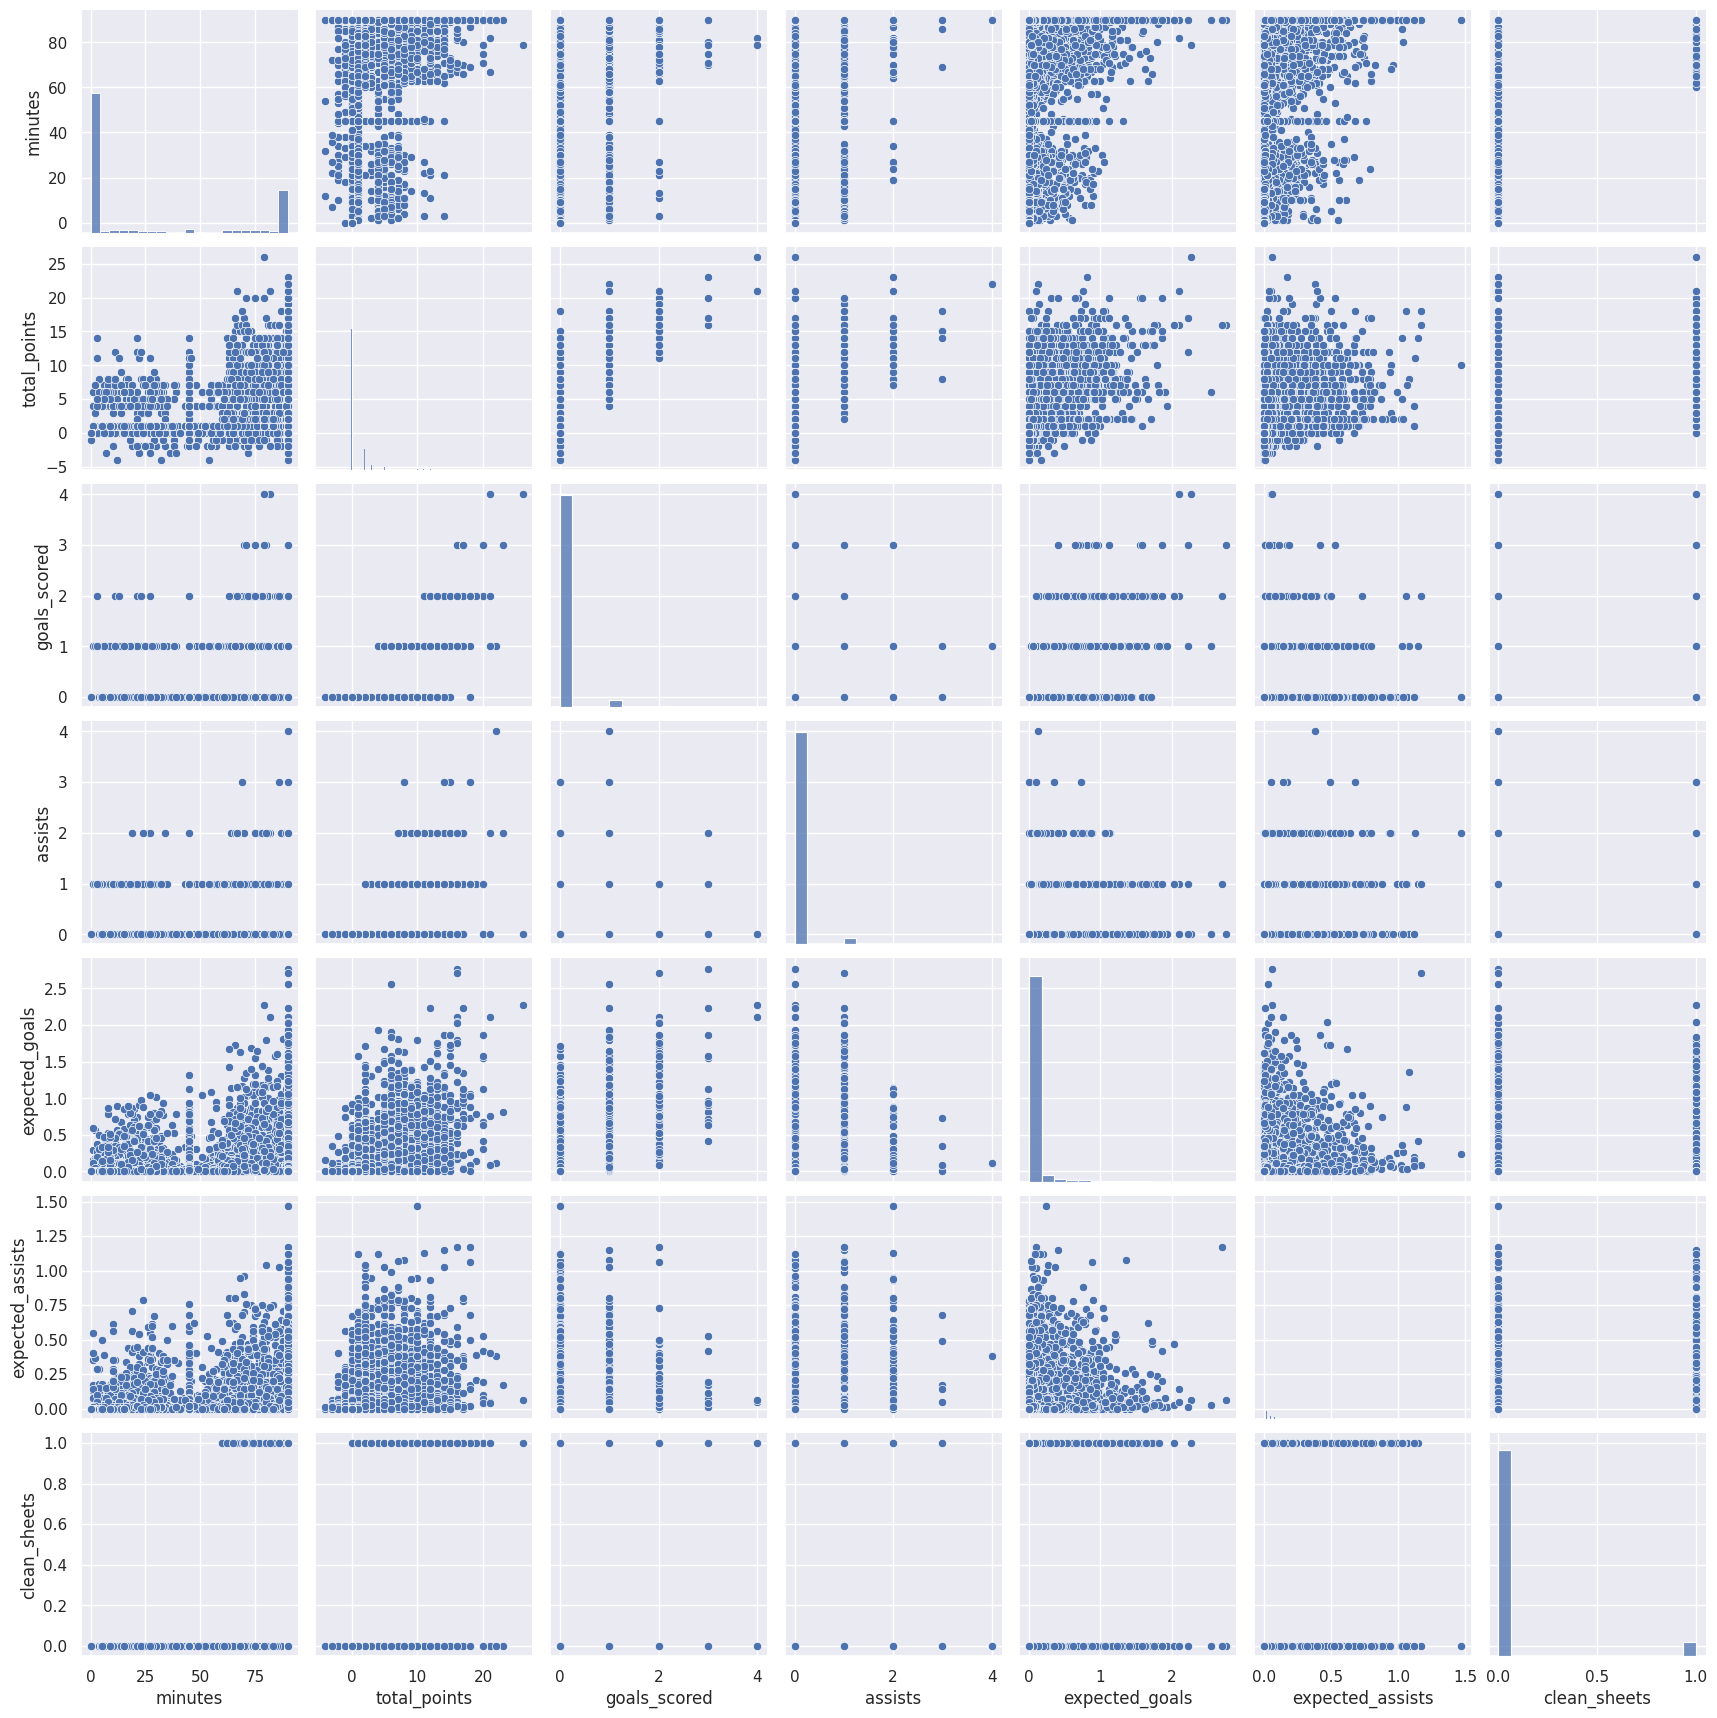

In [55]:
sns.set()
cols = ['minutes', 'total_points', 'goals_scored', 'assists', 'expected_goals', 'expected_assists', 'clean_sheets']
sns.pairplot(df[cols])

<Axes: xlabel='expected_goals', ylabel='total_points'>

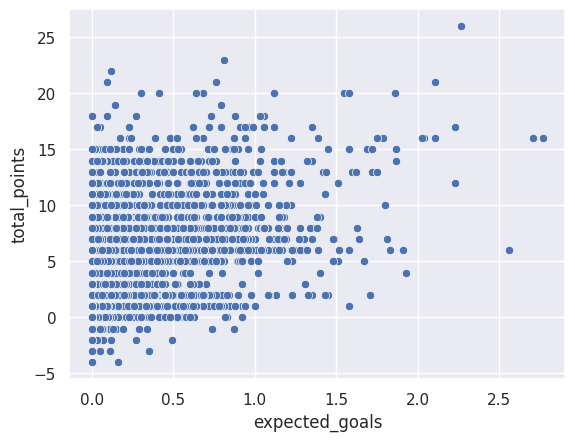

In [56]:
sns.scatterplot(data = df, x = df.expected_goals, y = df.total_points)

<Axes: xlabel='goals_scored', ylabel='total_points'>

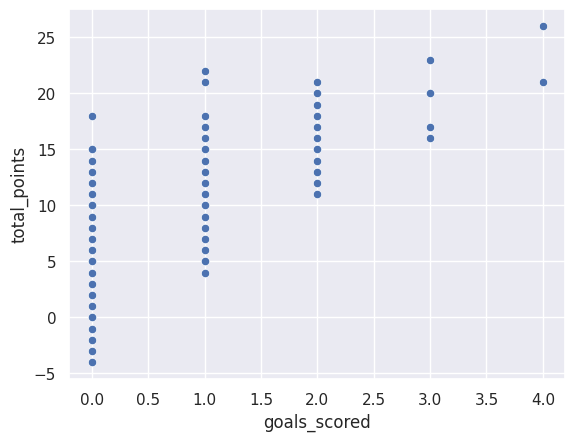

In [57]:
sns.scatterplot(data = df, x = df.goals_scored, y = df.total_points)

<Axes: xlabel='minutes', ylabel='total_points'>

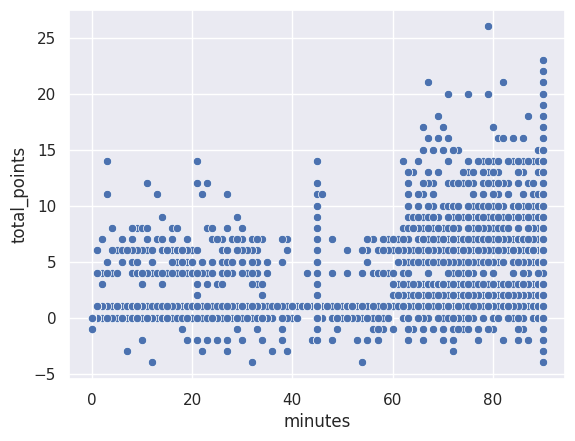

In [58]:
sns.scatterplot(data = df, x = df.minutes, y = df.total_points)

In [ ]:
#Let's check what dropping players with 0 xG does

In [167]:
import random

In [168]:
df_players_stats_oh = pd.read_csv('df_players_stats_oh.csv')

In [169]:
df = df_players_stats_oh.drop(columns = ['element', 'opponent_team', 'minutes', 'goals_scored', 'assists', 'expected_goals', 'expected_assists', 'clean_sheets']) #avg_minutes dropped based on the plots below, rmse dropped

In [170]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='total_points'), df['total_points'], test_size=0.2)

In [171]:
X_train['indeces_to_remove'] = [1 if (x == 0 and random.random() < 0.5) else 0 for x in X_train["avg_xG"]]

In [172]:
y_train = y_train[X_train['indeces_to_remove'] == 0]

In [173]:
X_train = X_train[X_train['indeces_to_remove'] == 0]

In [174]:
X_train = X_train.drop(columns = ['indeces_to_remove'])

In [175]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=250, max_depth = 5, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=250, oob_score=True,
                      random_state=0)

In [176]:
predictions = regressor.predict(X_test)
# Evaluating the model
rmse = root_mean_squared_error(y_test, predictions)
print(f'Root Mean Squared Error: {rmse}') 
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Root Mean Squared Error: 1.9051372974621699
R-squared: 0.28245671566232355


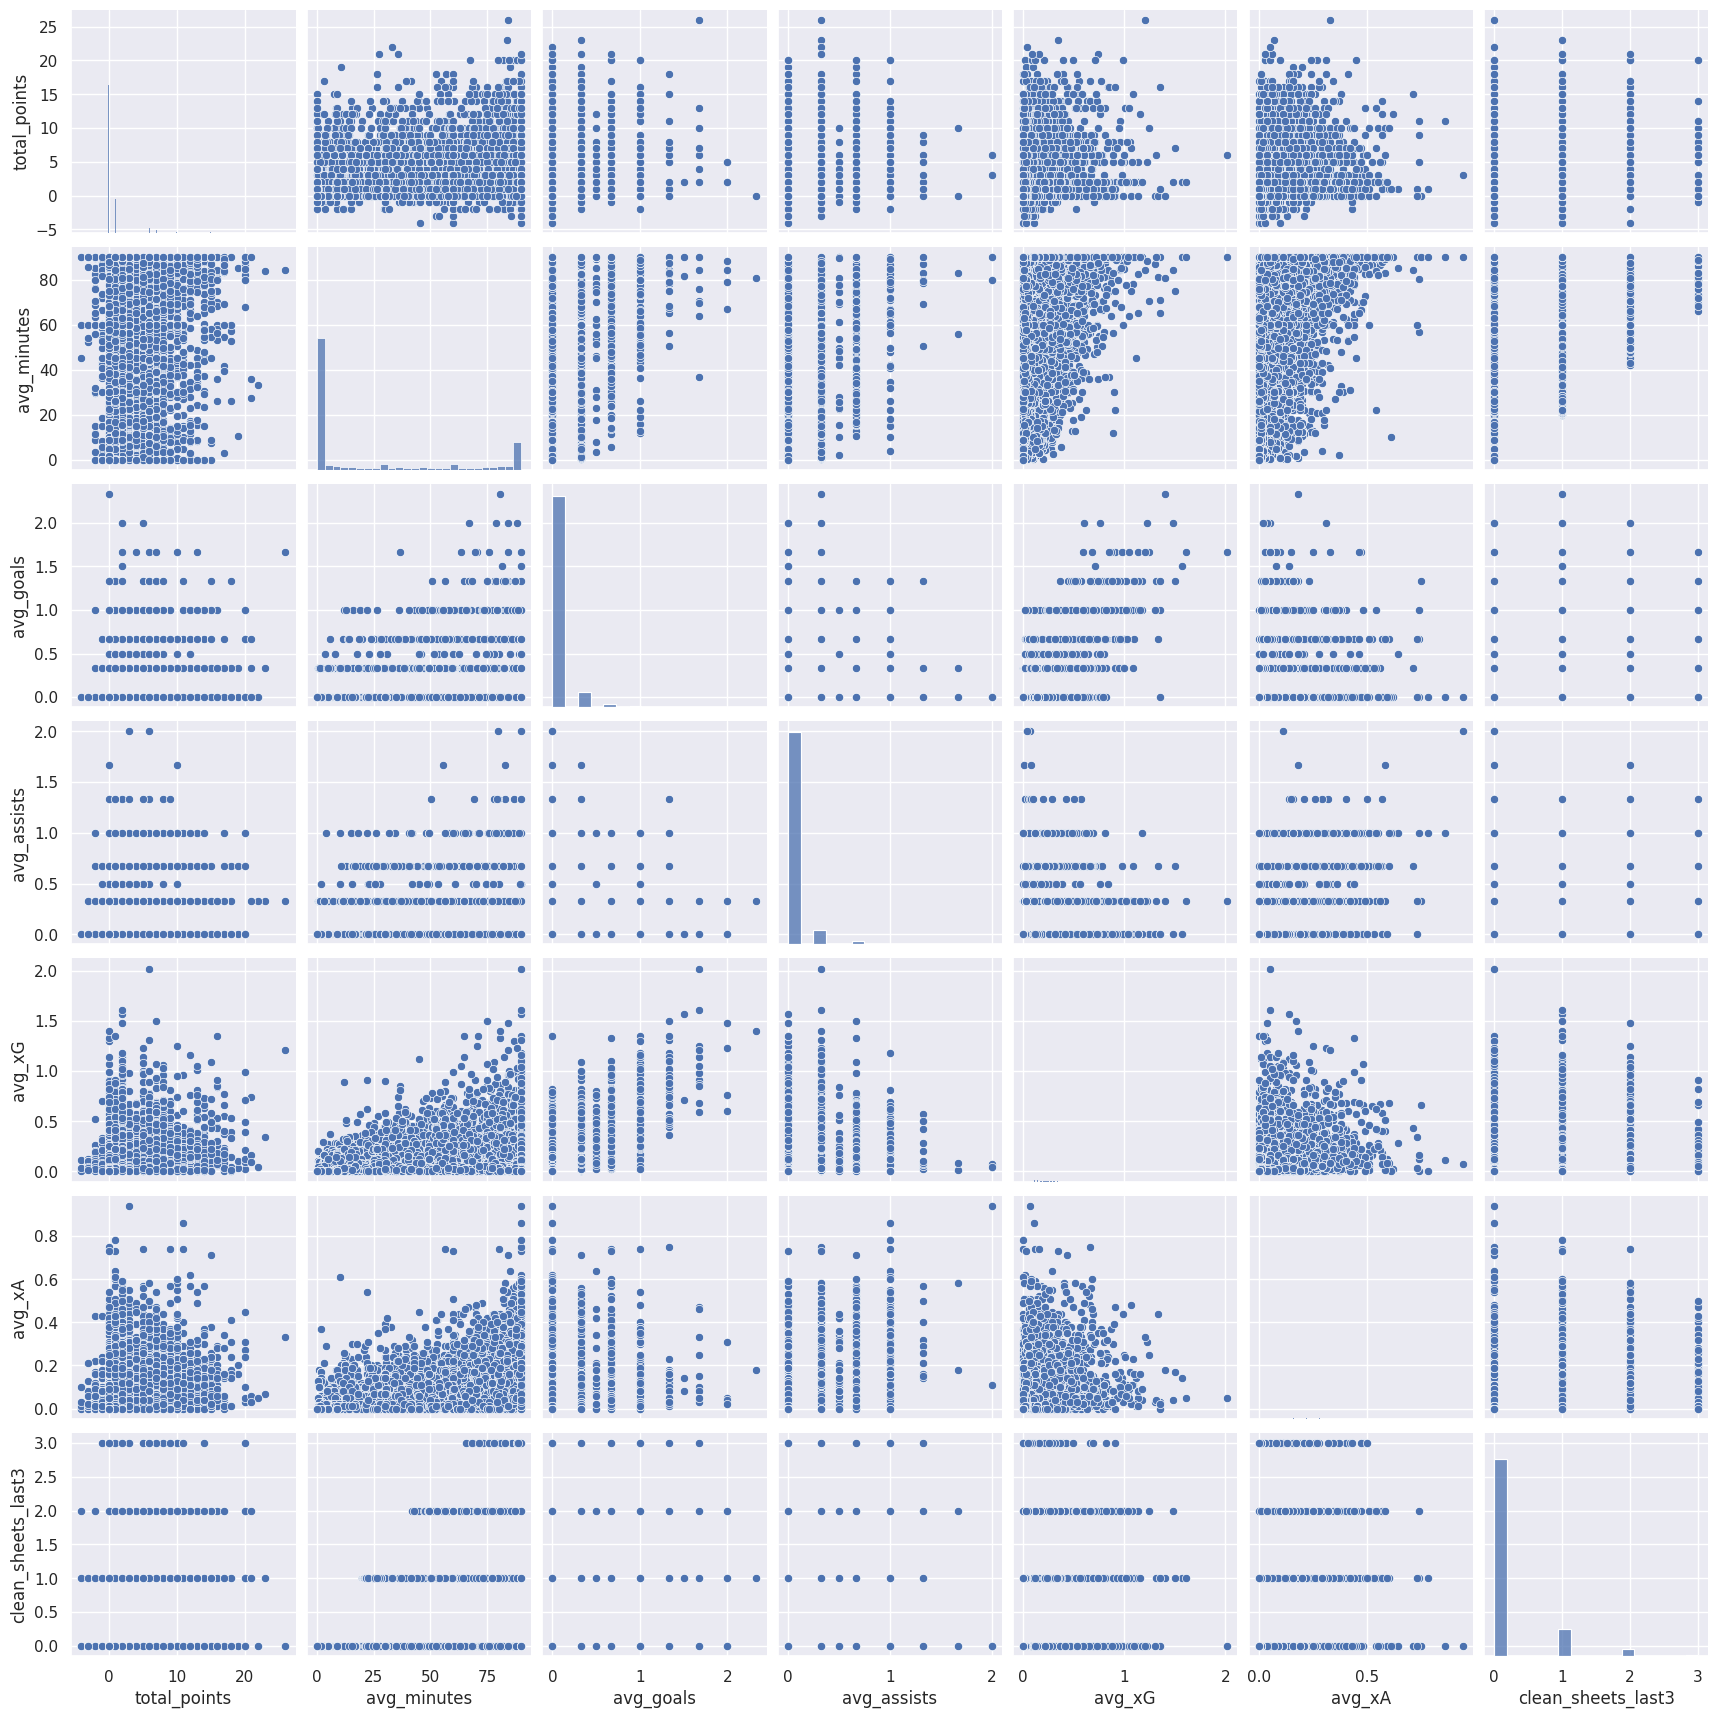

In [14]:
sns.set()
cols = ['total_points','avg_minutes', 'avg_goals', 'avg_assists', 'avg_xG', 'avg_xA', 'clean_sheets_last3']
sns.pairplot(df[cols])

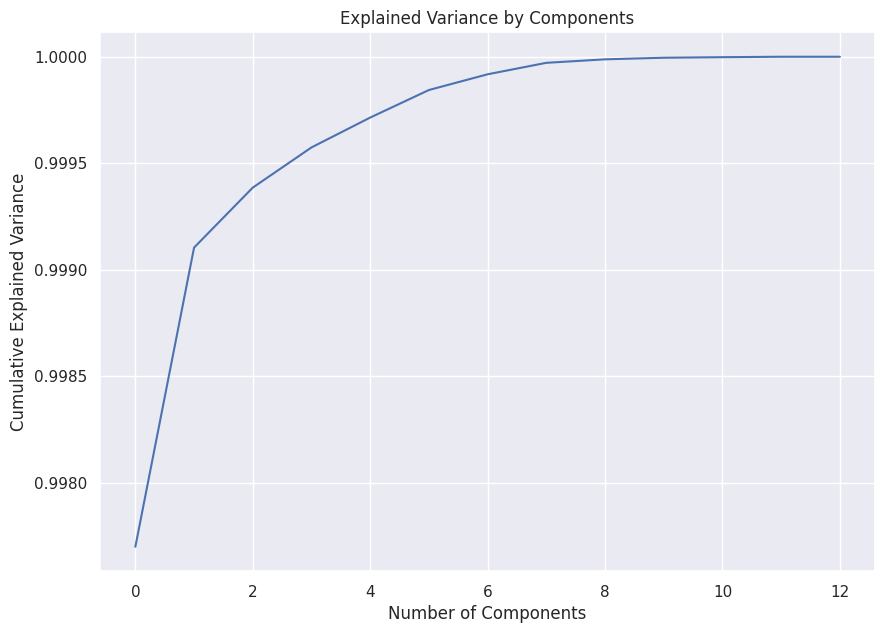

In [15]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,7))
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()

In [16]:
#Let's prepare a chart showing actual points vs prediction

In [177]:
y_test_array = y_test.to_numpy()

In [178]:
len(y_test_array)

5910

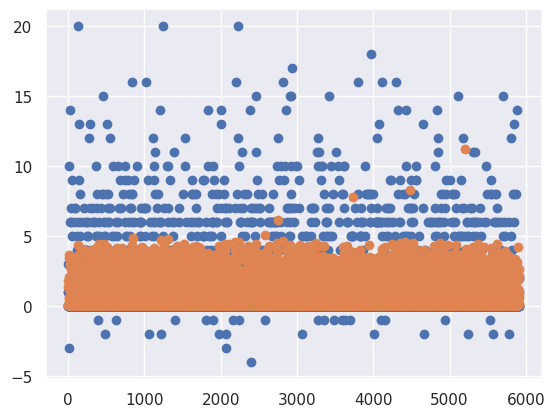

In [179]:
plt.scatter(range(1, 5911), y_test_array) 
plt.scatter(range(1, 5911), predictions) 

In [180]:
max(predictions)

11.218852036275472

In [48]:
#Let's try to drop from X_train and y_train values where: total points are negative, total points are over 10

In [196]:
import random

In [197]:
df_players_stats_oh = pd.read_csv('df_players_stats_oh.csv')

In [198]:
df = df_players_stats_oh.drop(columns = ['element', 'opponent_team', 'minutes', 'goals_scored', 'assists', 'expected_goals', 'expected_assists', 'clean_sheets'])

In [199]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='total_points'), df['total_points'], test_size=0.2)

In [200]:
y_train = y_train.to_frame()

In [201]:
y_train['cols_to_remove'] = y_train['total_points'].apply(lambda x: 1 if x > 15 else 0)

In [202]:
X_train = X_train[y_train['cols_to_remove'] == 0]

In [203]:
y_train = y_train[y_train['cols_to_remove'] == 0]

In [204]:
y_train['cols_to_remove'] = [1 if (x == 0 and random.random() < 0.9) else 0 for x in y_train["total_points"]]

In [205]:
X_train = X_train[y_train['cols_to_remove'] == 0]

In [206]:
y_train = y_train[y_train['cols_to_remove'] == 0]

In [207]:
y_train.drop(columns = ['cols_to_remove'], inplace = True)

In [208]:
y_train = pd.Series(y_train['total_points'])

In [209]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=250, max_depth = 5, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=250, oob_score=True,
                      random_state=0)

In [210]:
predictions = regressor.predict(X_test)
# Evaluating the model
rmse = root_mean_squared_error(y_test, predictions)
print(f'Root Mean Squared Error: {rmse}') 
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Root Mean Squared Error: 1.9448037919807513
R-squared: 0.20600678759824442


In [211]:
y_test_array = y_test.to_numpy()

In [212]:
len(y_test_array)

5910

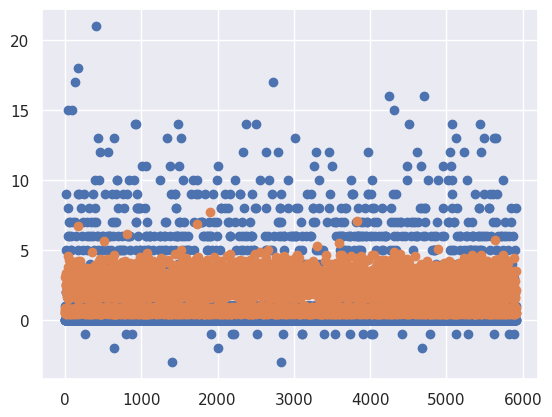

In [213]:
plt.scatter(range(1, 5911), y_test_array) 
plt.scatter(range(1, 5911), predictions) 

In [214]:
#Let's try to predict performance of 1 OVERPERFORMING player based on the data on all of other players. Example Bryan Mbuemo id = 108

In [226]:
df_players_stats_oh = pd.read_csv('df_players_stats_oh.csv')

In [227]:
df = df_players_stats_oh.drop(columns = ['opponent_team', 'minutes', 'goals_scored', 'assists', 'expected_goals', 'expected_assists', 'clean_sheets'])

In [228]:
X_train = df.drop(df[df['element'] == 108].index)

In [231]:
X_train = X_train.drop(columns = ['element'])

In [232]:
y_train = X_train['total_points']

In [234]:
X_train = X_train.drop(columns = ['total_points'])

In [235]:
X_test = df[df['element'] == 108]

In [241]:
y_test = X_test['total_points']

In [248]:
X_test = X_test.drop(columns = ['total_points', 'element'])

In [249]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=250, max_depth = 5, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=250, oob_score=True,
                      random_state=0)

In [250]:
predictions = regressor.predict(X_test)
# Evaluating the model
rmse = root_mean_squared_error(y_test, predictions)
print(f'Root Mean Squared Error: {rmse}') 
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Root Mean Squared Error: 3.931539960413271
R-squared: 0.18483921957885774


In [251]:
y_test_array = y_test.to_numpy()

In [252]:
len(y_test_array)

38

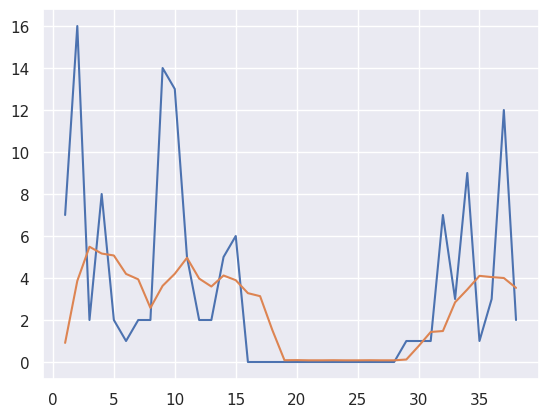

In [256]:
plt.plot(range(1, 39), y_test_array) 
plt.plot(range(1, 39), predictions) 

In [258]:
#Let's do the same for AVERAGE player. Fe. Pedro Neto id = 567

In [259]:
df_players_stats_oh = pd.read_csv('df_players_stats_oh.csv')

In [260]:
df = df_players_stats_oh.drop(columns = ['opponent_team', 'minutes', 'goals_scored', 'assists', 'expected_goals', 'expected_assists', 'clean_sheets'])

In [261]:
X_train = df.drop(df[df['element'] == 567].index)

In [262]:
X_train = X_train.drop(columns = ['element'])

In [263]:
y_train = X_train['total_points']

In [264]:
X_train = X_train.drop(columns = ['total_points'])

In [265]:
X_test = df[df['element'] == 567]

In [266]:
y_test = X_test['total_points']

In [267]:
X_test = X_test.drop(columns = ['total_points', 'element'])

In [268]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=250, max_depth = 5, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=250, oob_score=True,
                      random_state=0)

In [269]:
predictions = regressor.predict(X_test)
# Evaluating the model
rmse = root_mean_squared_error(y_test, predictions)
print(f'Root Mean Squared Error: {rmse}') 
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Root Mean Squared Error: 2.5873013007204264
R-squared: 0.3364689139274656


In [270]:
y_test_array = y_test.to_numpy()

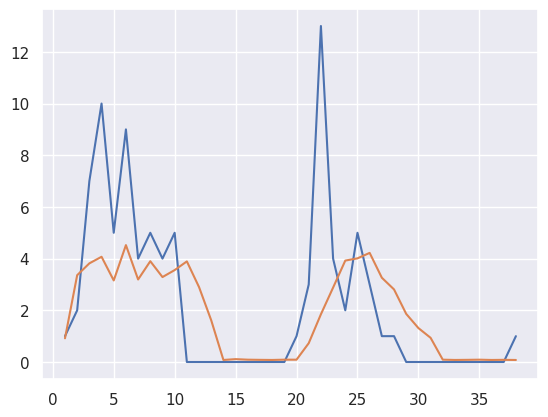

In [271]:
plt.plot(range(1, 39), y_test_array) 
plt.plot(range(1, 39), predictions) 

In [272]:
#TO DO: ZMIENIĆ OKNO DO ŚREDNI Z 3 MECZÓW DO 2 I SPRAWDZIĆ WYNIKI